In [1]:
#importing libraries

import pandas as pd
import sklearn as sk

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split #preprocessing
from sklearn.linear_model import LinearRegression

import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt  # Matlab-style plotting

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:   
        print(os.path.join(dirname, filename))

In [2]:
#importing dataset
data = pd.read_csv('Vegetable-and-Fruits-Prices-in-India.csv')

In [3]:
#directory 
os.getcwd()

'G:\\MCA\\6thSem\\myproject\\Agricultural-Food-Price-Prediction'

In [4]:
#data display
data

,datesk,Item Name,Date,price
0,20110101,Kashini greens,1/1/2011,NaN
1,20110101,Pineapple juice,1/1/2011,NaN
2,20110101,Thailand Juice,1/1/2011,NaN
3,20110101,Thailand Jelly,1/1/2011,NaN
4,20110101,Orange juice,1/1/2011,NaN
...,...,...,...,...
1009819,20201231,Mint Leaves,31/12/2020,NaN
1009820,20201231,Chillies small (C.B.P),31/12/2020,NaN
1009821,20201231,Pumpkin Red,31/12/2020,NaN
1009822,20201231,Potato(M),31/12/2020,NaN


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009824 entries, 0 to 1009823
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   datesk     1009824 non-null  int64  
 1   Item Name  1000716 non-null  object 
 2   Date       1009824 non-null  object 
 3   price      647230 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 30.8+ MB
None


In [6]:
print(data.describe())

             datesk          price
count  1.009824e+06  647230.000000
mean   2.014957e+07      52.421706
std    2.770352e+04      69.022717
min    2.011010e+07       0.000000
25%    2.013013e+07       0.000000
50%    2.015023e+07      30.000000
75%    2.017033e+07      68.000000
max    2.020123e+07     863.000000


In [7]:
data.agg(['count', 'unique', 'min', 'max'])

,datesk,Item Name,Date,price
count,1009824,1000716,1009824,647230
unique,"[20110101, 20110102, 20110103, 20110104, 20110...","[Kashini greens, Pineapple juice, Thailand Jui...","[1/1/2011, 2/1/2011, 3/1/2011, 4/1/2011, 5/1/2...","[nan, 32.0, 0.0, 56.0, 14.0, 22.0, 21.0, 3.1, ..."
min,20110101,NaN,1/1/2011,0.0
max,20201231,NaN,9/9/2020,863.0


In [8]:
print(data.shape)

(1009824, 4)


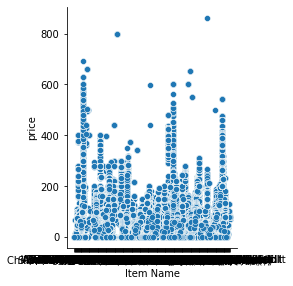

In [9]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['Item Name'] ,
             y_vars='price', height=4, aspect=1, kind='scatter')
plt.show()

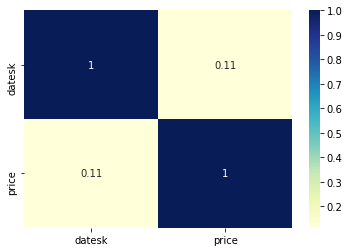

In [10]:
# Visualizing the data using heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

Data Preprocessing

In [11]:
#Sort data by name
data.sort_values("Item Name", inplace = True)
  
# making a bool series to sort duplicate data
bool_series = data["Item Name"].duplicated()
  
# displaying data
data.head()
  
# display data
data[bool_series]

,datesk,Item Name,Date,price
760110,20170406,Amla,6/4/2017,78.0
192237,20120731,Amla,31-07-2012,76.0
73267,20110809,Amla,9/8/2011,35.0
406350,20140507,Amla,7/5/2014,60.0
353473,20131127,Amla,27/11/2013,30.0
...,...,...,...,...
1009457,20201230,NaN,30/12/2020,NaN
1009458,20201230,NaN,30/12/2020,NaN
1009815,20201231,NaN,31/12/2020,NaN
1009816,20201231,NaN,31/12/2020,NaN


In [12]:
print("Training Data")
display(data)

#look for duplicate data, invalid data or corrupt data and remove it
data.duplicated().sum()
                                    
def isDataMissing(DataToCheck):
#missing data
    total = DataToCheck.isnull().sum().sort_values(ascending=False)
    percent = (DataToCheck.isnull().sum()/DataToCheck.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    display(missing_data.head(30))
    

Training Data


,datesk,Item Name,Date,price
388462,20140313,Amla,13/03/2014,52.0
760110,20170406,Amla,6/4/2017,78.0
192237,20120731,Amla,31-07-2012,76.0
73267,20110809,Amla,9/8/2011,35.0
406350,20140507,Amla,7/5/2014,60.0
...,...,...,...,...
1009457,20201230,NaN,30/12/2020,NaN
1009458,20201230,NaN,30/12/2020,NaN
1009815,20201231,NaN,31/12/2020,NaN
1009816,20201231,NaN,31/12/2020,NaN


In [13]:
data.sort_values("Item Name", inplace = True)
display(data)

,datesk,Item Name,Date,price
388462,20140313,Amla,13/03/2014,52.0
424210,20140629,Amla,29/06/2014,NaN
373543,20140127,Amla,27/01/2014,44.0
738631,20170131,Amla,31/01/2017,54.0
210719,20120924,Amla,24-09-2012,60.0
...,...,...,...,...
1009457,20201230,NaN,30/12/2020,NaN
1009458,20201230,NaN,30/12/2020,NaN
1009815,20201231,NaN,31/12/2020,NaN
1009816,20201231,NaN,31/12/2020,NaN


In [14]:
#Unique Item Names
uniqueValues = data['Item Name'].unique()
print('Unique elements in column "Item Name" ')
print(uniqueValues)
#Unique Item Names Count
uniqueNValues = data['Item Name'].nunique()
print('Number of unique values in column "Item Name" of the dataframe : ')
print(uniqueNValues)

Unique elements in column "Item Name" 
['Amla' 'Anjura/Fig' 'Apple Australia' 'Apple Chaina Delicious'
 'Apple Chilli' 'Apple Delicious' 'Apple Economy' 'Apple Fuji chaina'
 'Apple Golden delicious' 'Apple Green smith' 'Apple Newzeland'
 'Apple Premium' 'Apple Simla' 'Apple Washington' 'Apple hazarath palli'
 'Apple juice' 'Arive greens' 'Avare seed (FB seeds)'
 'Avarebele (F. Beans spok)' 'Avarekai (Field Beans )' 'Baby corn'
 'Baby corn cleaned' 'Badami' 'Bale hoovu(B.flower)'
 'BaleDindu (Banana stem)' 'Banana Nendra' 'Banana Rasabale'
 'Banana Yellaki' 'Banana chandra' 'Banana cooking R.Banana'
 'Banana karpura' 'Banana pachabale' 'Basale Greens' 'Batani kalu' 'Beans'
 'Beans Fruit' 'Beans Nati' 'Beans Ring' 'Beans cleaned' 'Beet Root'
 'Ber fruit/Bore fruit' 'Berry Delhi' 'Berry Golden' 'Berry Green'
 'Berry Soft' 'Berry Southafrica' 'Berry ball' 'Berry fruit Ooty'
 'Bitter Gourd' 'Bore fruit' 'Bottle Gourd' 'Brahmi amla juice'
 'Bread fruit' 'Brinjal (R)' 'Brinjal (W)' 'Brinjal B

In [15]:
print("Check for Missing Data in Training Set")
isDataMissing(data)
#%=no.of missing data /total data

Check for Missing Data in Training Set


,Total,Percent
price,362594,0.359067
Item Name,9108,0.009019
datesk,0,0.000000
Date,0,0.000000


In [16]:
#Since Datesk is id field so removing it
data.drop(columns =['datesk'],inplace=True)

#Remove rows where item name is blank 
print("Removing rows where item name is blank")
data = data[~data['Item Name'].isnull()]
display(data)

#Extract year from date column
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data.drop(columns='Date',inplace=True)

Removing rows where item name is blank


,Item Name,Date,price
388462,Amla,13/03/2014,52.0
424210,Amla,29/06/2014,NaN
373543,Amla,27/01/2014,44.0
738631,Amla,31/01/2017,54.0
210719,Amla,24-09-2012,60.0
...,...,...,...
343528,mango Pickles,28/10/2013,NaN
582877,mango Pickles,20/10/2015,NaN
919764,mango Pickles,5/4/2020,NaN
603523,mango Pickles,21/12/2015,NaN


<ipython-input-16-5c48660b043f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])
<ipython-input-16-5c48660b043f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['Date'].dt.year
C:\Users\RAFWT\miniconda3\envs\final\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [17]:
MeanPrices = data.groupby(['Item Name','year']).mean()
print("Mean Prices for all the items on yearwise basis")
display(MeanPrices)

Mean Prices for all the items on yearwise basis


price
Item Name     year           
Amla          2011  35.000000
              2012  50.191919
              2013  47.660131
              2014  55.006689
              2015  68.776316
...                       ...
mango Pickles 2016  60.000000
              2017        NaN
              2018        NaN
              2019        NaN
              2020  60.000000

[3298 rows x 1 columns]

In [18]:
#Save records where price is null or 0 for the items in null prices dataframe
print("Null Prices Dataset containing null and 0 values for price")
nullPrices = data[(data['price'].isnull()) | (data['price']== 0)]
display(nullPrices)

Null Prices Dataset containing null and 0 values for price


,Item Name,price,year
424210,Amla,NaN,2014
586735,Amla,NaN,2015
359378,Amla,NaN,2013
51820,Amla,NaN,2011
688202,Amla,NaN,2016
...,...,...,...
343528,mango Pickles,NaN,2013
582877,mango Pickles,NaN,2015
919764,mango Pickles,NaN,2020
603523,mango Pickles,NaN,2015


In [19]:
#Remove rows where price is null or price is 0 as we will assign mean values for them later

data = data[~((data['price'].isnull()) | (data['price']== 0))]
print("Removing null and 0 prices from the training dataset for feature engineering")
display(data)

Removing null and 0 prices from the training dataset for feature engineering


,Item Name,price,year
388462,Amla,52.0,2014
373543,Amla,44.0,2014
738631,Amla,54.0,2017
210719,Amla,60.0,2012
667556,Amla,80.0,2016
...,...,...,...
488547,mango Pickles,60.0,2015
447023,mango Pickles,60.0,2014
891374,mango Pickles,60.0,2020
53679,mango Pickles,60.0,2011


In [20]:
print("Assigning Mean Price to training set data where price is 0 or Nan")
nullPrices = pd.merge(nullPrices,MeanPrices,left_on=['Item Name','year'],right_on=['Item Name','year'])
display(nullPrices.drop(columns=['price_x']))

df = pd.DataFrame({"Item Name":nullPrices['Item Name'], 
                    "year":nullPrices['year'],"price":nullPrices['price_y']}) 
train_data = data.append(df)
display("Combine dataset after feature engineering")
display(train_data)

Assigning Mean Price to training set data where price is 0 or Nan


,Item Name,year,price_y
0,Amla,2014,55.006689
1,Amla,2014,55.006689
2,Amla,2014,55.006689
3,Amla,2014,55.006689
4,Amla,2014,55.006689
...,...,...,...
534598,mango Pickles,2019,NaN
534599,mango Pickles,2019,NaN
534600,mango Pickles,2019,NaN
534601,mango Pickles,2019,NaN


'Combine dataset after feature engineering'

,Item Name,price,year
388462,Amla,52.0,2014
373543,Amla,44.0,2014
738631,Amla,54.0,2017
210719,Amla,60.0,2012
667556,Amla,80.0,2016
...,...,...,...
534598,mango Pickles,NaN,2019
534599,mango Pickles,NaN,2019
534600,mango Pickles,NaN,2019
534601,mango Pickles,NaN,2019


In [21]:
#price cannot be zero so filter out data where price is around zero
train_data = train_data[(train_data['price']> 1)]
backup = train_data
print("Backup")
display(backup)

Backup


,Item Name,price,year
388462,Amla,52.0,2014
373543,Amla,44.0,2014
738631,Amla,54.0,2017
210719,Amla,60.0,2012
667556,Amla,80.0,2016
...,...,...,...
534176,mango Pickles,60.0,2014
534177,mango Pickles,60.0,2014
534178,mango Pickles,60.0,2014
534179,mango Pickles,60.0,2014


In [22]:
# Declare feature variable and target variable

X = data['year'].values
y = data['price'].values

# Date and price data values are given by X and y respectively.

# Values attribute of pandas dataframe returns the numpy arrays.

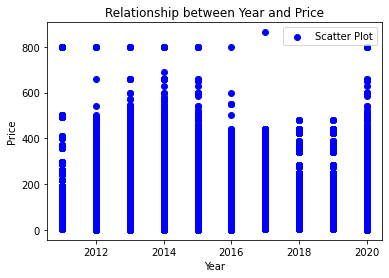

<Figure size 432x288 with 0 Axes>

In [23]:
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Year and Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()
plt.savefig("scatterplot.png")

C:\Users\RAFWT\miniconda3\envs\final\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 3.608624902196924


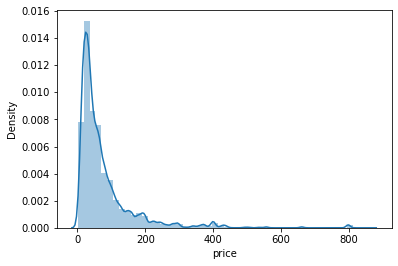

In [24]:

train_data = pd.get_dummies(train_data).reset_index(drop=True)
sns.distplot(train_data['price']);

print("Skewness: " + str(train_data['price'].skew()))


plt.savefig("skewness.png") # save as png

C:\Users\RAFWT\miniconda3\envs\final\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


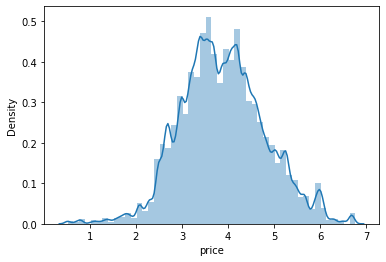

In [25]:
#Histogram is not normally distributed
#sns.distplot(train_data['price']);
#applying log transformation
train_data['price'] = np.log(train_data['price'])
sns.distplot(train_data['price']); 

plt.savefig("log_transformation.png")

In [26]:
train_output = train_data['price']
#Remove target output column Price from training dataset
train_data.drop(columns='price',inplace=True)
print("Training Dataset")
display(train_data)

X_train, X_test, y_train, y_test = train_test_split(train_data, train_output, test_size = 0.1, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mean_squared_error(y_pred,y_test)

Training Dataset


,year,Item Name_Amla,Item Name_Anjura/Fig,Item Name_Apple Australia,Item Name_Apple Chaina Delicious,Item Name_Apple Chilli,Item Name_Apple Delicious,Item Name_Apple Economy,Item Name_Apple Fuji chaina,Item Name_Apple Golden delicious,...,Item Name_Times Rose berry,Item Name_Tomoto,Item Name_Washington gala apple,Item Name_Washington red apple,Item Name_Watermellon,Item Name_Watermellon kiran,Item Name_Y.Bananan T.N.,Item Name_Yam/S.Root,Item Name_knol-khol,Item Name_mango Pickles
0,2014,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787045,2014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
787046,2014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
787047,2014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
787048,2014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


0.14593785853557023

In [27]:
#Preparing Test Data for 2021 Price predictions
test_data = pd.DataFrame(columns = [ 'year','Item Name'])
#Since there are 330 unique items predicting prices for these items in 2021 year
for item in backup['Item Name'].unique():
    test_data = test_data.append({'Item Name': str(item), 'year':2021},ignore_index=True)

display(test_data)

,year,Item Name
0,2021,Amla
1,2021,Anjura/Fig
2,2021,Apple Australia
3,2021,Apple Chaina Delicious
4,2021,Apple Chilli
...,...,...
297,2021,Watermellon kiran
298,2021,Y.Bananan T.N.
299,2021,Yam/S.Root
300,2021,knol-khol


In [28]:
#One Hot Encoding

In [29]:
test_data_one_hot = pd.get_dummies(test_data).reset_index(drop=True)

test_data_one_hot.rename(columns ={'year_2021':'year'},inplace=True)
test_data_one_hot['year'] = 2021

print("Testing Data")
display(test_data_one_hot)

Testing Data


,year,Item Name_Amla,Item Name_Anjura/Fig,Item Name_Apple Australia,Item Name_Apple Chaina Delicious,Item Name_Apple Chilli,Item Name_Apple Delicious,Item Name_Apple Economy,Item Name_Apple Fuji chaina,Item Name_Apple Golden delicious,...,Item Name_Times Rose berry,Item Name_Tomoto,Item Name_Washington gala apple,Item Name_Washington red apple,Item Name_Watermellon,Item Name_Watermellon kiran,Item Name_Y.Bananan T.N.,Item Name_Yam/S.Root,Item Name_knol-khol,Item Name_mango Pickles
0,2021,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
298,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
299,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
300,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
regressor.fit(train_data, train_output)

predictions = regressor.predict(test_data_one_hot)
#print(predictions)

preds = pd.DataFrame()
#convert the logarithmic values to normal form
preds['price'] =np.exp(predictions)
preds['Item Name'] = test_data['Item Name']
preds['year'] = test_data['year']
print("Average price predictions for 2021 year ")
display(preds)

Average price predictions for 2021 year 


,price,Item Name,year
0,68.634060,Amla,2021
1,91.004465,Anjura/Fig,2021
2,156.369482,Apple Australia,2021
3,193.039361,Apple Chaina Delicious,2021
4,120.694791,Apple Chilli,2021
...,...,...,...
297,22.791383,Watermellon kiran,2021
298,198.531182,Y.Bananan T.N.,2021
299,46.115402,Yam/S.Root,2021
300,33.064148,knol-khol,2021


In [31]:
result_df = preds[['Item Name','price']]

In [32]:
result_df.head()

,Item Name,price
0,Amla,68.634060
1,Anjura/Fig,91.004465
2,Apple Australia,156.369482
3,Apple Chaina Delicious,193.039361
4,Apple Chilli,120.694791


In [33]:
result_df.tail()

,Item Name,price
297,Watermellon kiran,22.791383
298,Y.Bananan T.N.,198.531182
299,Yam/S.Root,46.115402
300,knol-khol,33.064148
301,mango Pickles,79.192629


In [34]:
result_df.to_csv('Predict_vegetable_2021_price.csv')